In [183]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob

In [184]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [287]:
def wipl_radiation_output_reader(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
          
    if len(path_to_file.split('/')[-1].split('_'))==8:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7].split('.')[0],
                  'WingDomain' : 'NA'
                  }
    elif len(path_to_file.split('/')[-1].split('_'))==9:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7],
                  'WingDomain' : path_to_file.split('/')[-1].split('_')[8].split('.')[0]
                  }
    
    
    return ra1_df, ra1_dict

In [325]:
#data_dir='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Insect/Roman/ra1_files/'
data_dir='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Insect/Roman/ra1_files/Test/'

In [326]:
files=sorted(glob(data_dir+'LepidopteraNoctuidaeMoth_12_*'))
#e1_files.sort(key = lambda x: int(x.split('_')[10]))
print(files)

['/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Insect/Roman/ra1_files/Test/LepidopteraNoctuidaeMoth_12_Full_M_0250_1000_94_MirkLBG.ra1', '/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Insect/Roman/ra1_files/Test/LepidopteraNoctuidaeMoth_12_Full_M_0250_1000_94_MirkLBG_ChenMaxandLegs.ra1', '/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Insect/Roman/ra1_files/Test/LepidopteraNoctuidaeMoth_12_Full_M_0250_1000_94_MirkLBG_ChenMean.ra1', '/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/M

In [327]:
radiation_data=[]
radiation_metadata=[]
for f in files:
    file_name=f.split('/')[-1].split('.')[0]
    (ra1_df, ra1_dict)= wipl_radiation_output_reader(f)
    radiation_data.append(ra1_df)
    radiation_metadata.append(ra1_dict)

In [328]:
r=radiation_data[0]['RCS_dB'].loc[radiation_data[0]['theta'] == -90.0]
print(r)

0       -0.769532
181     -0.775840
362     -0.783404
543     -0.792222
724     -0.802290
           ...   
64436   -0.756898
64617   -0.758164
64798   -0.760692
64979   -0.764482
65160   -0.769532
Name: RCS_dB, Length: 361, dtype: float64


In [329]:
ra1_dict

{'BugType': 'LepidopteraNoctuidaeMoth',
 'Specimen_Number': '12',
 'BodyType': 'Wingless',
 'WingPositioning': 'na',
 'Resolution': 25.0,
 'Scale': 100.0,
 'Frequency': 9.4,
 'InternalDomain': 'MirkLBG',
 'WingDomain': 'NA'}

[{'BugType': 'LepidopteraNoctuidaeMoth', 'Specimen_Number': '12', 'BodyType': 'Full', 'WingPositioning': 'M', 'Resolution': 25.0, 'Scale': 100.0, 'Frequency': 9.4, 'InternalDomain': 'MirkLBG', 'WingDomain': 'NA'}, {'BugType': 'LepidopteraNoctuidaeMoth', 'Specimen_Number': '12', 'BodyType': 'Full', 'WingPositioning': 'M', 'Resolution': 25.0, 'Scale': 100.0, 'Frequency': 9.4, 'InternalDomain': 'MirkLBG', 'WingDomain': 'ChenMaxandLegs'}, {'BugType': 'LepidopteraNoctuidaeMoth', 'Specimen_Number': '12', 'BodyType': 'Full', 'WingPositioning': 'M', 'Resolution': 25.0, 'Scale': 100.0, 'Frequency': 9.4, 'InternalDomain': 'MirkLBG', 'WingDomain': 'ChenMean'}, {'BugType': 'LepidopteraNoctuidaeMoth', 'Specimen_Number': '12', 'BodyType': 'Full', 'WingPositioning': 'M', 'Resolution': 25.0, 'Scale': 100.0, 'Frequency': 9.4, 'InternalDomain': 'MirkLBG', 'WingDomain': 'ChenMinandLegs'}, {'BugType': 'LepidopteraNoctuidaeMoth', 'Specimen_Number': '12', 'BodyType': 'Full', 'WingPositioning': 'M', 'Resolut

/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


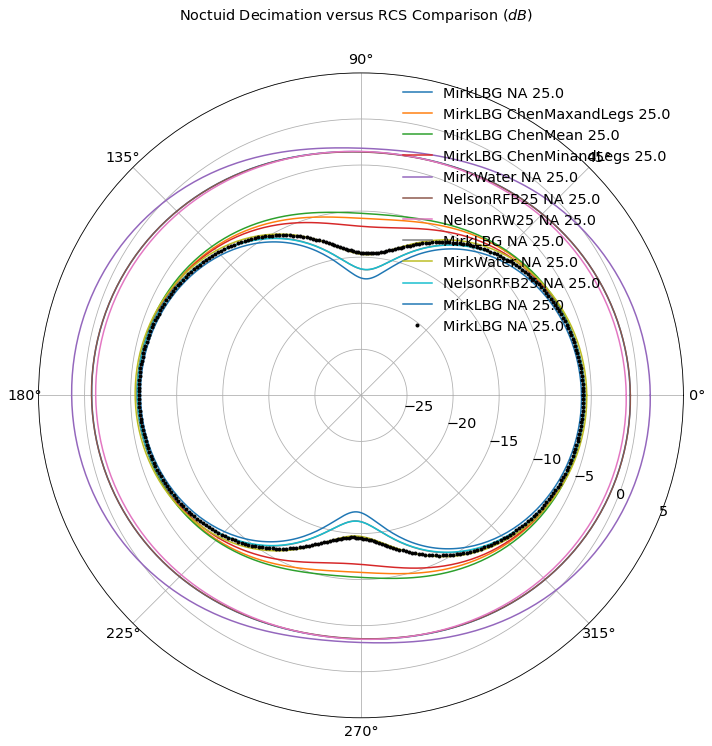

In [330]:
max_r=[]
min_r=[]
n=[]

fig, axs = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=[10,15], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

print(radiation_metadata)
plt.suptitle('Noctuid Decimation versus RCS Comparison ($dB$)', y=.85,fontsize ='x-large')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS_dB'].loc[radiation_data[idx]['theta'] == -90.0]
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx]['Resolution'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs.plot(angle,r, 'k.', label=str(radiation_metadata[idx]['InternalDomain'])+' '+str(radiation_metadata[idx]['WingDomain'])+' '+str(radiation_metadata[idx]['Resolution']))
    else:
        axs.plot(angle,r,label=str(radiation_metadata[idx]['InternalDomain'])+' '+str(radiation_metadata[idx]['WingDomain'])+' '+str(radiation_metadata[idx]['Resolution']))

    
axs.set_rmin(-30)
axs.set_rmax(5)
axs.set_rlabel_position(-22.5) 
plt.legend(loc='upper right', frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


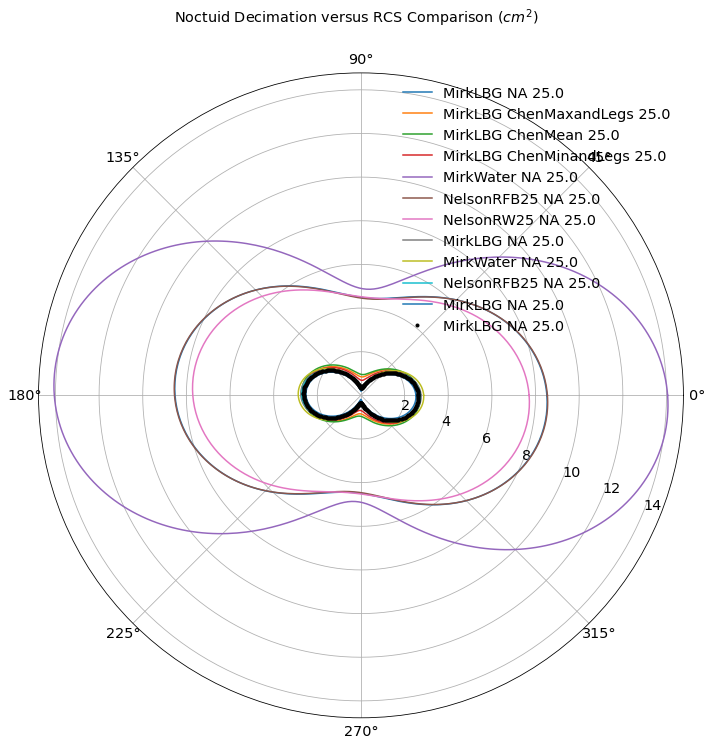

In [331]:
max_r=[]
min_r=[]
n=[]

fig, axs = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=[10,15], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.suptitle('Noctuid Decimation versus RCS Comparison ($cm^2$)', y=.85,fontsize ='x-large')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx]['Resolution'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs.plot(angle,r, 'k.', label=str(radiation_metadata[idx]['InternalDomain'])+' '+str(radiation_metadata[idx]['WingDomain'])+' '+str(radiation_metadata[idx]['Resolution']))
    else:
        axs.plot(angle,r,label=str(radiation_metadata[idx]['InternalDomain'])+' '+str(radiation_metadata[idx]['WingDomain'])+' '+str(radiation_metadata[idx]['Resolution']))

    
#axs.set_rmin(min(min_r)*0.9)
#axs.set_rmax(max(max_r)*1.1)
axs.set_rlabel_position(-22.5) 
plt.legend(loc='upper right', frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

(0.0, 10.0)

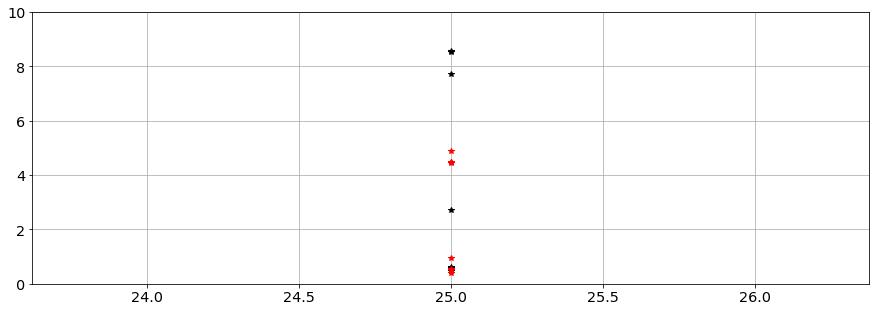

In [312]:
fig, axs = plt.subplots(1,1, figsize=[15,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')
axs.plot(n, max_r, 'k*', label='RCS Max' )
axs.plot(n, min_r, 'r*', label='RCS Min')
axs.grid(True)
axs.set_ylim([0,10])



In [161]:
## Need to make plot above with time and unknowns; An check IWS file.

In [153]:
min_r

[2.077583645492264,
 4.1455404408505245,
 3.7849647487034783,
 4.2800003740643735,
 4.388040987895374,
 4.466864171377918,
 4.538500518873046,
 4.554915043023883,
 4.5492576082904455,
 4.554003345581698,
 4.567447926643473]

In [154]:
n

[0.8, 1.6, 3.1, 6.3, 12.5, 25.0, 37.5, 50.0, 62.5, 75.0, 87.5]

In [ ]:
len(n)

In [ ]:
len(max_r)